In [366]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

In [ ]:
def add_gaussian_noise(image, mean, std_dev):
    # Generate random noise with the same shape as the image
    # PT: Gera um ruído aleatório com o mesmo formato da imagem
    noise = np.random.normal(mean, std_dev, image.shape)

    # Add the noise to the image
    # PT: Adiciona o ruído à imagem
    noisy_image = image + noise

    return noisy_image

# Read the image
# PT: Lê a imagem
im = Image.open("./Images/foto.tif")


# Now we use the mean of noisy images to get a clean image, for 1,5,10,20,50 and 100 images
# PT: Agora, nós utilizamos a média de imagens ruidosas para limpar a imagem, para 1,5,10,20,50 e 100 imagens

numbers = [1, 5, 10, 20, 50, 100]
new_images=[]

def mean_noisy_images(image, samples):
    # Converts the image to an array
    # PT: Converte a imagem para uma array
    image = np.asarray(image)
    temp_images = []
    for i in range(samples):
        noisy_image = add_gaussian_noise(image, mean=0, std_dev=64)
        temp_images.append(noisy_image)

    # Compute the mean image by summing and dividing by samples
    # PT: Computa a imagem média somando e dividindo pela quantidade de amostras
    mean_image = np.mean(temp_images, axis=0)

    return mean_image

# Now we aplly the fuction for the defined numbers of samples
# PT: Agora nós aplicamos a função para os números definidos de amostras
for n in numbers:
    new_images.append(mean_noisy_images(im, n))


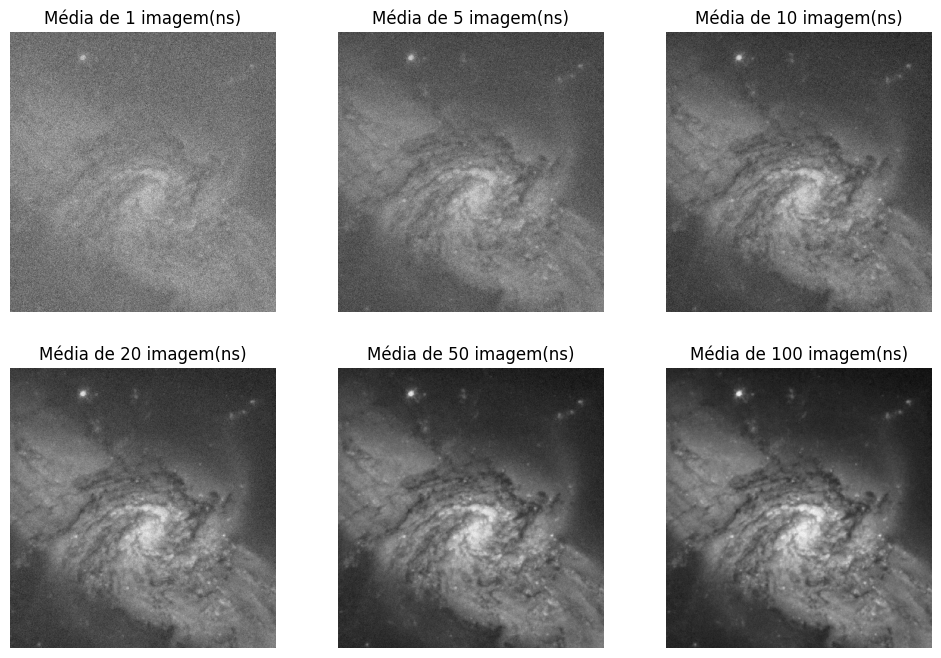

In [368]:
# Display of the generated images
# PT: Exibição das imagens geradas

fig = plt.figure(figsize=(12, 8))

for i in range(6):
    plt.subplot(2, 3, i + 1); plt.title(f"Média de {numbers[i]} imagem(ns)"); plt.axis("off"); plt.imshow(new_images[i], cmap="gray")

plt.show()